# K-mean

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
x,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=51)
import warnings
warnings.filterwarnings('ignore')



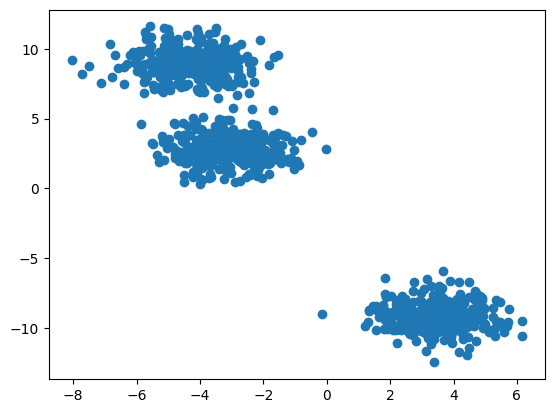

In [48]:
plt.scatter(x[:,0],x[:,1])

### Elbow curve

In [49]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


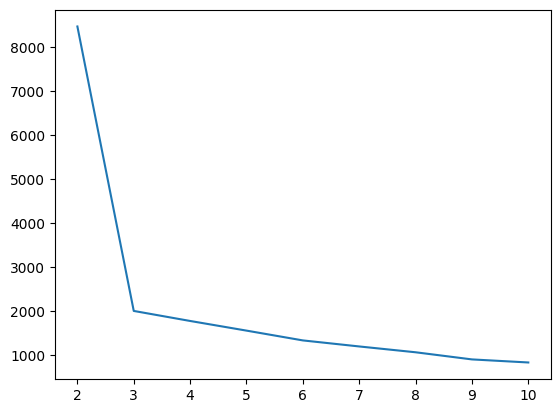

In [50]:
plt.plot(range(2,11),wcss)

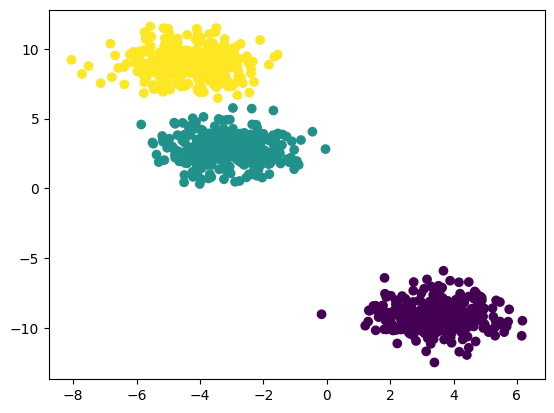

In [54]:
from sklearn.metrics import confusion_matrix
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)
label=kmeans.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=label)

In [28]:
label[:10]

array([2, 0, 1, 1, 0, 0, 2, 2, 2, 1], dtype=int32)

In [29]:
y[:10]

array([1, 0, 2, 2, 0, 0, 1, 1, 1, 2])

# Agglomerative Clustering


In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

In [31]:
linkage_data=linkage(x,method='ward',metric='euclidean')

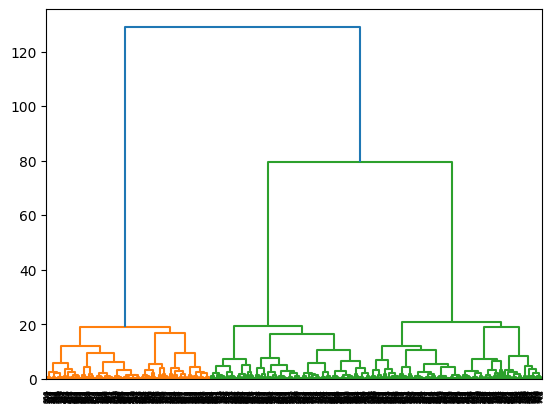

In [32]:
dendrogram(linkage_data);

In [52]:
hr_cluster=AgglomerativeClustering(n_clusters=3,linkage='ward')
hr_predict=hr_cluster.fit_predict(x)


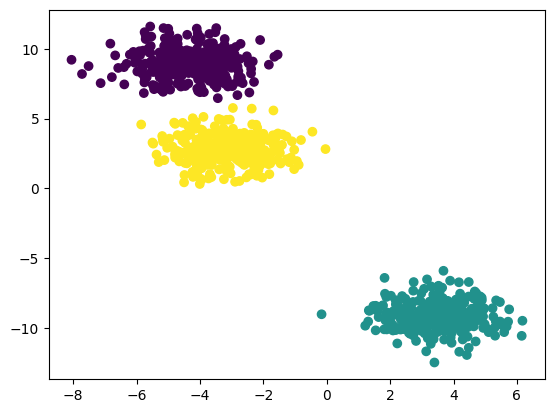

In [53]:
plt.scatter(x[:,0],x[:,1],c=hr_predict)

In [55]:
from  sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x,y=make_blobs(n_samples=1000,n_features=8,centers=3)
from sklearn.decomposition  import PCA


In [56]:
pca=PCA()
pca_df=pd.DataFrame(pca.fit_transform(x))
pca.explained_variance_

array([137.2925824 ,  58.40750962,   1.11717118,   1.08373164,
         1.01503926,   0.98938262,   0.95251188,   0.91211316])

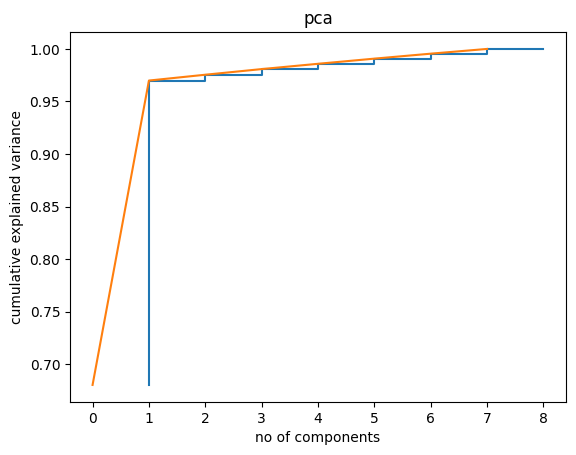

In [57]:
plt.step((range(1,9)),np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of components')
plt.ylabel('cumulative explained variance')
plt.title('pca')
plt.show()

# DBSCAN


In [58]:
from sklearn.datasets import make_circles,make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [59]:
#x,_=make_circles(n_samples=750,factor=.5,noise=.03,random_state=4)
#plt.scatter(x[:,0],x[:,1])

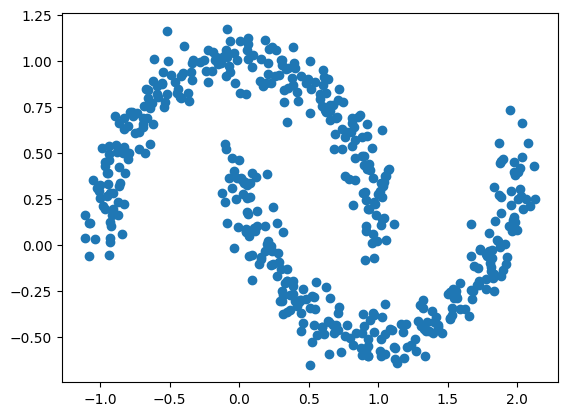

In [60]:
x,_=make_moons(n_samples=500,noise=.08,random_state=4)
plt.scatter(x[:,0],x[:,1])

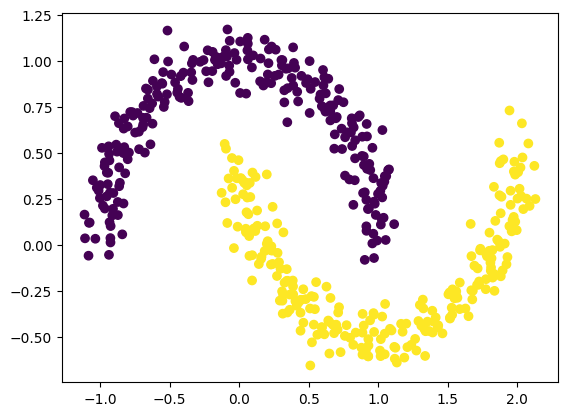

In [62]:
dbscan =DBSCAN(eps=0.2
               ,min_samples=5)
clusters=dbscan.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=clusters)

In [63]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)


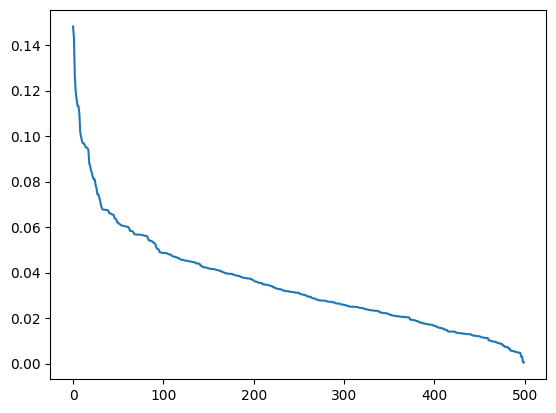

In [64]:
distances=sorted(distances[:,1],reverse=True)
plt.plot(distances)

In [ ]:
# min_samples=2*colomns+1


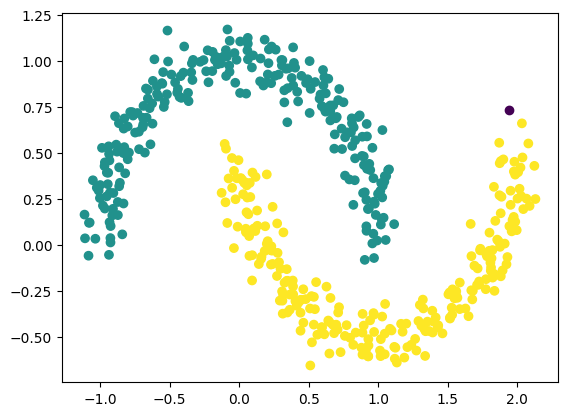

In [65]:
dbscan =DBSCAN(eps=0.15,min_samples=5)
clusters=dbscan.fit_predict(x)
plt.scatter(x[:,0],x[:,-1],c=clusters)